**Importing Libraries**

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

**Loading the dataset**

In [2]:
df = pd.read_csv("/content/sample_data/salarydata.csv")
df.head()

,age,workclass,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,salary
0,39,State-gov,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K


**Data Cleaning**

In [3]:
#checking for null values
df.isnull().sum()

age               0
workclass         0
education         0
education-num     0
marital-status    0
occupation        0
relationship      0
race              0
sex               0
capital-gain      0
capital-loss      0
hours-per-week    0
native-country    0
salary            0
dtype: int64

In [4]:
#removing unnecessary columns
df = df.drop(columns=['capital-gain','capital-loss']) #Since capital-gain and loss comes after salary, they donot affect salary
df.head()

,age,workclass,education,education-num,marital-status,occupation,relationship,race,sex,hours-per-week,native-country,salary
0,39,State-gov,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,40,United-States,<=50K
1,50,Self-emp-not-inc,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,13,United-States,<=50K
2,38,Private,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,40,United-States,<=50K
3,53,Private,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,40,United-States,<=50K
4,28,Private,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,40,Cuba,<=50K


In [5]:
#since education and education-num both denote the same
df = df.drop(columns=['education-num'])
df.head()

,age,workclass,education,marital-status,occupation,relationship,race,sex,hours-per-week,native-country,salary
0,39,State-gov,Bachelors,Never-married,Adm-clerical,Not-in-family,White,Male,40,United-States,<=50K
1,50,Self-emp-not-inc,Bachelors,Married-civ-spouse,Exec-managerial,Husband,White,Male,13,United-States,<=50K
2,38,Private,HS-grad,Divorced,Handlers-cleaners,Not-in-family,White,Male,40,United-States,<=50K
3,53,Private,11th,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,40,United-States,<=50K
4,28,Private,Bachelors,Married-civ-spouse,Prof-specialty,Wife,Black,Female,40,Cuba,<=50K


In [6]:
df['age'].unique()   #no '?' values in the output

array([39, 50, 38, 53, 28, 37, 49, 52, 31, 42, 30, 23, 32, 40, 34, 25, 43,
       54, 35, 59, 56, 19, 20, 45, 22, 48, 21, 24, 57, 44, 41, 29, 18, 47,
       46, 36, 79, 27, 67, 33, 76, 17, 55, 61, 70, 64, 71, 68, 66, 51, 58,
       26, 60, 90, 75, 65, 77, 62, 63, 80, 72, 74, 69, 73, 81, 78, 88, 82,
       83, 84, 85, 86, 87])

In [7]:
df['workclass'].unique()    # '?' values in the output

array(['State-gov', 'Self-emp-not-inc', 'Private', 'Federal-gov',
       'Local-gov', '?', 'Self-emp-inc', 'Without-pay', 'Never-worked'],
      dtype=object)

In [8]:
df['education'].unique()    #no '?' values in the output

array(['Bachelors', 'HS-grad', '11th', 'Masters', '9th', 'Some-college',
       'Assoc-acdm', 'Assoc-voc', '7th-8th', 'Doctorate', 'Prof-school',
       '5th-6th', '10th', '1st-4th', 'Preschool', '12th'], dtype=object)

In [9]:
df['marital-status'].unique()     #no '?' values in the output

array(['Never-married', 'Married-civ-spouse', 'Divorced',
       'Married-spouse-absent', 'Separated', 'Married-AF-spouse',
       'Widowed'], dtype=object)

In [10]:
df['occupation'].unique()     # '?' values in the output

array(['Adm-clerical', 'Exec-managerial', 'Handlers-cleaners',
       'Prof-specialty', 'Other-service', 'Sales', 'Craft-repair',
       'Transport-moving', 'Farming-fishing', 'Machine-op-inspct',
       'Tech-support', '?', 'Protective-serv', 'Armed-Forces',
       'Priv-house-serv'], dtype=object)

In [11]:
df['relationship'].unique()     #no '?' values in the output

array(['Not-in-family', 'Husband', 'Wife', 'Own-child', 'Unmarried',
       'Other-relative'], dtype=object)

In [12]:
df['race'].unique()     #no '?' values in the output

array(['White', 'Black', 'Asian-Pac-Islander', 'Amer-Indian-Eskimo',
       'Other'], dtype=object)

In [13]:
df['sex'].unique()     #no '?' values in the output


array(['Male', 'Female'], dtype=object)

In [14]:
df['hours-per-week'].unique()     #no '?' values in the output

array([40, 13, 16, 45, 50, 80, 30, 35, 60, 20, 52, 44, 15, 25, 38, 43, 55,
       48, 58, 32, 70,  2, 22, 56, 41, 28, 36, 24, 46, 42, 12, 65,  1, 10,
       34, 75, 98, 33, 54,  8,  6, 64, 19, 18, 72,  5,  9, 47, 37, 21, 26,
       14,  4, 59,  7, 99, 53, 39, 62, 57, 78, 90, 66, 11, 49, 84,  3, 17,
       68, 27, 85, 31, 51, 77, 63, 23, 87, 88, 73, 89, 97, 94, 29, 96, 67,
       82, 86, 91, 81, 76, 92, 61, 74, 95])

In [15]:
df['native-country'].unique()       # '?' values in the output

array(['United-States', 'Cuba', 'Jamaica', 'India', '?', 'Mexico',
       'South', 'Puerto-Rico', 'Honduras', 'England', 'Canada', 'Germany',
       'Iran', 'Philippines', 'Italy', 'Poland', 'Columbia', 'Cambodia',
       'Thailand', 'Ecuador', 'Laos', 'Taiwan', 'Haiti', 'Portugal',
       'Dominican-Republic', 'El-Salvador', 'France', 'Guatemala',
       'China', 'Japan', 'Yugoslavia', 'Peru',
       'Outlying-US(Guam-USVI-etc)', 'Scotland', 'Trinadad&Tobago',
       'Greece', 'Nicaragua', 'Vietnam', 'Hong', 'Ireland', 'Hungary',
       'Holand-Netherlands'], dtype=object)

In [16]:
#Modifying the '?' values in workclass,occupation and native-country to 'Unknown'
df.loc[df['workclass'] == '?', 'workclass'] = 'Unknown'
df.loc[df['occupation'] == '?', 'occupation'] = 'Unknown'
df.loc[df['native-country'] == '?', 'native-country'] = 'Unknown'

In [17]:
df.head()

,age,workclass,education,marital-status,occupation,relationship,race,sex,hours-per-week,native-country,salary
0,39,State-gov,Bachelors,Never-married,Adm-clerical,Not-in-family,White,Male,40,United-States,<=50K
1,50,Self-emp-not-inc,Bachelors,Married-civ-spouse,Exec-managerial,Husband,White,Male,13,United-States,<=50K
2,38,Private,HS-grad,Divorced,Handlers-cleaners,Not-in-family,White,Male,40,United-States,<=50K
3,53,Private,11th,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,40,United-States,<=50K
4,28,Private,Bachelors,Married-civ-spouse,Prof-specialty,Wife,Black,Female,40,Cuba,<=50K


**Data Visualization**

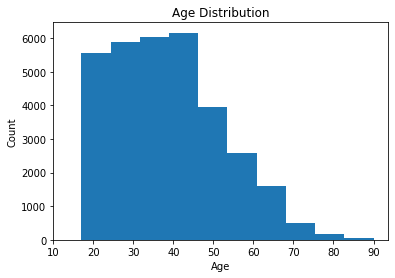

In [18]:
#Visualizing age distribution
plt.hist(df['age'])
plt.xlabel("Age")
plt.ylabel("Count")
plt.xticks(np.arange(10,100,10))
plt.title("Age Distribution")
plt.show()

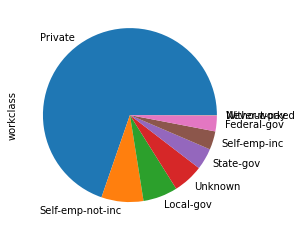

In [19]:
#Visualizing workclass distribution
df['workclass'].value_counts().plot(kind='pie')

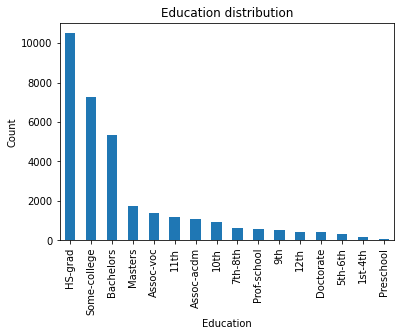

In [20]:
#Visualizing Education distribution
df["education"].value_counts().plot(kind='bar')
plt.rcParams['figure.figsize']=(10,5)
plt.xlabel('Education')
plt.ylabel("Count")
plt.title("Education distribution")
plt.show()

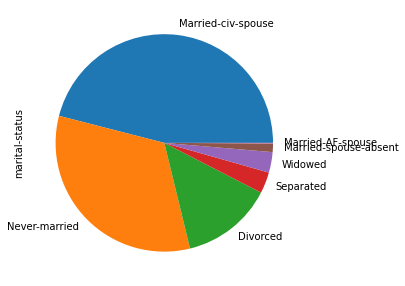

In [21]:
#Visualizing marital status distribution
df['marital-status'].value_counts().plot(kind='pie')


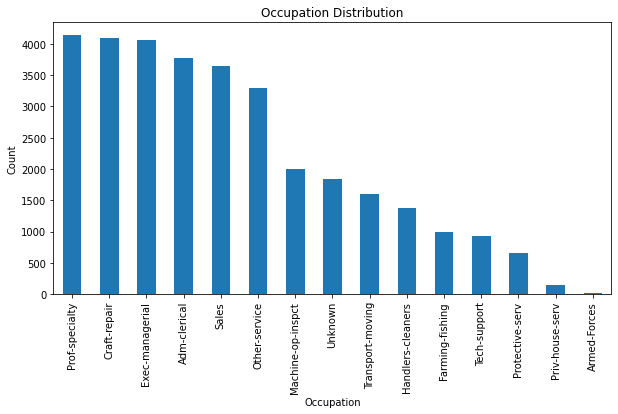

In [22]:
#Visualizing Occupation distribution
df.loc[df['occupation'] == '?','occupation'] = 'Unknown'
df['occupation'].value_counts().plot(kind='bar')
plt.xlabel("Occupation")
plt.ylabel("Count")
plt.title("Occupation Distribution")
plt.rcParams['figure.figsize'] = (10,5)
plt.show()

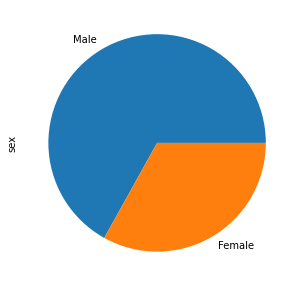

In [23]:
#visualizing gender distribution
df['sex'].value_counts().plot(kind='pie')

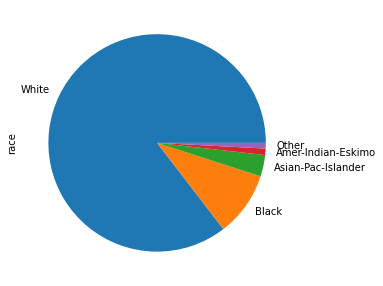

In [24]:
#visualizing race distribution
df['race'].value_counts().plot(kind='pie')

In [25]:
#Characteristics of 'hours per week'
df['hours-per-week'].describe()

count    32561.000000
mean        40.437456
std         12.347429
min          1.000000
25%         40.000000
50%         40.000000
75%         45.000000
max         99.000000
Name: hours-per-week, dtype: float64

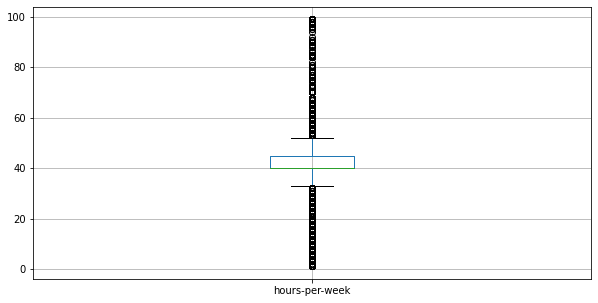

In [26]:
#Visualizing hours per week
df.boxplot(['hours-per-week'])
plt.show()

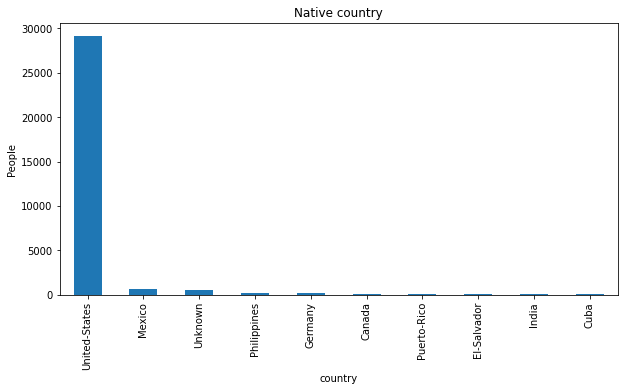

In [27]:
#Visualizing the distribution of native country
df['native-country'].value_counts().head(10).plot(kind = 'bar')
plt.xlabel('country')
plt.ylabel('People')
plt.title('Native country')
plt.show()

**Preprocessing the Data**

In [28]:
output = df.pop('salary')

In [29]:
character_features = df.dtypes.pipe(lambda x: x[x == 'object']).index
character_features


Index(['workclass', 'education', 'marital-status', 'occupation',
       'relationship', 'race', 'sex', 'native-country'],
      dtype='object')

In [30]:
#Since the values given in these feature columns are characters, we have to convert it into numerical value.
column_change ={}
for col in character_features:
  df[col], column_change[col] = pd.factorize(df[col])
df.head()

,age,workclass,education,marital-status,occupation,relationship,race,sex,hours-per-week,native-country
0,39,0,0,0,0,0,0,0,40,0
1,50,1,0,1,1,1,0,0,13,0
2,38,2,1,2,2,0,0,0,40,0
3,53,2,2,1,2,1,1,0,40,0
4,28,2,0,1,3,2,1,1,40,1


**Preprocessing The Data**

In [31]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler

In [32]:
#since the difference between multiple feature values are very high, we scale it down.
scaler = StandardScaler() 
df = scaler.fit_transform(df.values)

In [33]:
df

array([[ 0.03067056, -1.88460023, -0.99158435, ..., -0.70307135,
        -0.03542945, -0.25574647],
       [ 0.83710898, -1.0687461 , -0.99158435, ..., -0.70307135,
        -2.22215312, -0.25574647],
       [-0.04264203, -0.25289198, -0.70202542, ..., -0.70307135,
        -0.03542945, -0.25574647],
       ...,
       [ 1.42360965, -0.25289198, -0.70202542, ...,  1.42233076,
        -0.03542945, -0.25574647],
       [-1.21564337, -0.25289198, -0.70202542, ..., -0.70307135,
        -1.65522476, -0.25574647],
       [ 0.98373415,  3.01052452, -0.70202542, ...,  1.42233076,
        -0.03542945, -0.25574647]])

**TRAINING THE MODEL**

**1.Logistic Regression**

In [34]:
#splitting the data to train and test set
x_train, x_test, y_train, y_test = train_test_split(df,output,test_size = 0.25, random_state = 60)
#Training the model
Training = LogisticRegression().fit(x_train, y_train)
prediction = Training.predict(x_test)
print(classification_report(y_test, prediction))

              precision    recall  f1-score   support

       <=50K       0.80      0.94      0.86      6179
        >50K       0.57      0.23      0.33      1962

    accuracy                           0.77      8141
   macro avg       0.68      0.59      0.60      8141
weighted avg       0.74      0.77      0.74      8141



In [35]:
# example of grid searching key hyperparametres for logistic regression
from sklearn.datasets import make_blobs
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LogisticRegression
# define dataset
X, y = make_blobs(n_samples=1000, centers=2, n_features=100, cluster_std=20)
# define models and parameters
model = LogisticRegression()
solvers = ['newton-cg', 'lbfgs', 'liblinear']
penalty = ['l2']
c_values = [100, 10, 1.0, 0.1, 0.01]
# define grid search
grid = dict(solver=solvers,penalty=penalty,C=c_values)
cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)
grid_search = GridSearchCV(estimator=model, param_grid=grid, n_jobs=-1, cv=cv, scoring='accuracy',error_score=0)
grid_result = grid_search.fit(X, y)
# summarize results
print("Best: %f using %s" % (grid_result.best_score_, grid_result.best_params_))
means = grid_result.cv_results_['mean_test_score']
stds = grid_result.cv_results_['std_test_score']
params = grid_result.cv_results_['params']
for mean, stdev, param in zip(means, stds, params):
    print("%f (%f) with: %r" % (mean, stdev, param))

Best: 0.958667 using {'C': 0.01, 'penalty': 'l2', 'solver': 'liblinear'}
0.953333 (0.022111) with: {'C': 100, 'penalty': 'l2', 'solver': 'newton-cg'}
0.953667 (0.023307) with: {'C': 100, 'penalty': 'l2', 'solver': 'lbfgs'}
0.952333 (0.022313) with: {'C': 100, 'penalty': 'l2', 'solver': 'liblinear'}
0.953667 (0.022874) with: {'C': 10, 'penalty': 'l2', 'solver': 'newton-cg'}
0.954000 (0.022745) with: {'C': 10, 'penalty': 'l2', 'solver': 'lbfgs'}
0.952667 (0.022201) with: {'C': 10, 'penalty': 'l2', 'solver': 'liblinear'}
0.955667 (0.022164) with: {'C': 1.0, 'penalty': 'l2', 'solver': 'newton-cg'}
0.955000 (0.023202) with: {'C': 1.0, 'penalty': 'l2', 'solver': 'lbfgs'}
0.954000 (0.020429) with: {'C': 1.0, 'penalty': 'l2', 'solver': 'liblinear'}
0.955667 (0.023192) with: {'C': 0.1, 'penalty': 'l2', 'solver': 'newton-cg'}
0.955667 (0.023192) with: {'C': 0.1, 'penalty': 'l2', 'solver': 'lbfgs'}
0.955333 (0.020287) with: {'C': 0.1, 'penalty': 'l2', 'solver': 'liblinear'}
0.958000 (0.022716) wi

In [36]:
classifier = LogisticRegression(penalty = grid_result.best_params_['penalty'], C = grid_result.best_params_['C'], solver = grid_result.best_params_['solver']).fit(x_train, y_train)
prediction2 = classifier.predict(x_test)

print("---- Training complete-----")

---- Training complete-----


In [38]:
from sklearn.metrics import accuracy_score, precision_score, recall_score,f1_score,classification_report,confusion_matrix
print("accuracy is :", accuracy_score(y_test,prediction2))
print("\nclassification_report :\n", classification_report(y_test,prediction2))

accuracy is : 0.7725095197150227

classification_report :
               precision    recall  f1-score   support

       <=50K       0.79      0.95      0.86      6179
        >50K       0.57      0.23      0.32      1962

    accuracy                           0.77      8141
   macro avg       0.68      0.59      0.59      8141
weighted avg       0.74      0.77      0.73      8141



**2.Decision Tree**

In [39]:
from sklearn.tree import DecisionTreeClassifier
classifier2 = DecisionTreeClassifier()
classifier2.fit(x_train,y_train)
y_pred = classifier2.predict(x_test)

from sklearn.metrics import accuracy_score, precision_score, recall_score,f1_score,classification_report,confusion_matrix
print("accuracy is :", accuracy_score(y_test,y_pred))
print("\nclassification_report :\n", classification_report(y_test,y_pred))

accuracy is : 0.7701756540965483

classification_report :
               precision    recall  f1-score   support

       <=50K       0.85      0.85      0.85      6179
        >50K       0.52      0.52      0.52      1962

    accuracy                           0.77      8141
   macro avg       0.69      0.69      0.69      8141
weighted avg       0.77      0.77      0.77      8141



**3.Naive Bayes**

In [40]:
from sklearn.naive_bayes import GaussianNB
classifier3 = GaussianNB()
classifier3.fit(x_train,y_train)
y_pred3 = classifier3.predict(x_test)

from sklearn.metrics import accuracy_score, precision_score, recall_score,f1_score,classification_report,confusion_matrix
print("accuracy is :", accuracy_score(y_test,y_pred3))
print("\nclassification_report :\n", classification_report(y_test,y_pred3))

accuracy is : 0.7204274659132784

classification_report :
               precision    recall  f1-score   support

       <=50K       0.90      0.71      0.79      6179
        >50K       0.45      0.75      0.56      1962

    accuracy                           0.72      8141
   macro avg       0.68      0.73      0.68      8141
weighted avg       0.79      0.72      0.74      8141



**4. Support Vector Machine**

In [41]:
from sklearn.svm import SVC
classifier4 = SVC(kernel='rbf')
classifier4.fit(x_train,y_train)
y_pred4 = classifier4.predict(x_test)

from sklearn.metrics import accuracy_score, precision_score, recall_score,f1_score,classification_report,confusion_matrix
print("accuracy is :", accuracy_score(y_test,y_pred4))
print("\nclassification_report :\n", classification_report(y_test,y_pred4))

accuracy is : 0.8114482250337797

classification_report :
               precision    recall  f1-score   support

       <=50K       0.84      0.93      0.88      6179
        >50K       0.66      0.45      0.53      1962

    accuracy                           0.81      8141
   macro avg       0.75      0.69      0.71      8141
weighted avg       0.80      0.81      0.80      8141



In [42]:
param_grid = {'C': [0.1, 1, 10, 100, 1000], 
              'gamma': [1, 0.1, 0.01, 0.001, 0.0001],
              'kernel': ['rbf']} 
  
grid = GridSearchCV(SVC(), param_grid, refit = True, verbose = 3)
  
# fitting the model for grid search
grid.fit(x_train, y_train)

Fitting 5 folds for each of 25 candidates, totalling 125 fits
[CV] C=0.1, gamma=1, kernel=rbf ......................................


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


[CV] .......... C=0.1, gamma=1, kernel=rbf, score=0.799, total=  23.3s
[CV] C=0.1, gamma=1, kernel=rbf ......................................


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:   23.3s remaining:    0.0s


[CV] .......... C=0.1, gamma=1, kernel=rbf, score=0.799, total=  28.1s
[CV] C=0.1, gamma=1, kernel=rbf ......................................


[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:   51.3s remaining:    0.0s


[CV] .......... C=0.1, gamma=1, kernel=rbf, score=0.807, total=  23.5s
[CV] C=0.1, gamma=1, kernel=rbf ......................................
[CV] .......... C=0.1, gamma=1, kernel=rbf, score=0.803, total=  27.7s
[CV] C=0.1, gamma=1, kernel=rbf ......................................
[CV] .......... C=0.1, gamma=1, kernel=rbf, score=0.801, total=  22.8s
[CV] C=0.1, gamma=0.1, kernel=rbf ....................................
[CV] ........ C=0.1, gamma=0.1, kernel=rbf, score=0.798, total=  11.3s
[CV] C=0.1, gamma=0.1, kernel=rbf ....................................
[CV] ........ C=0.1, gamma=0.1, kernel=rbf, score=0.798, total=  11.1s
[CV] C=0.1, gamma=0.1, kernel=rbf ....................................
[CV] ........ C=0.1, gamma=0.1, kernel=rbf, score=0.797, total=  11.2s
[CV] C=0.1, gamma=0.1, kernel=rbf ....................................
[CV] ........ C=0.1, gamma=0.1, kernel=rbf, score=0.801, total=  11.0s
[CV] C=0.1, gamma=0.1, kernel=rbf ....................................
[CV] .

[Parallel(n_jobs=1)]: Done 125 out of 125 | elapsed: 93.3min finished


GridSearchCV(cv=None, error_score=nan,
             estimator=SVC(C=1.0, break_ties=False, cache_size=200,
                           class_weight=None, coef0=0.0,
                           decision_function_shape='ovr', degree=3,
                           gamma='scale', kernel='rbf', max_iter=-1,
                           probability=False, random_state=None, shrinking=True,
                           tol=0.001, verbose=False),
             iid='deprecated', n_jobs=None,
             param_grid={'C': [0.1, 1, 10, 100, 1000],
                         'gamma': [1, 0.1, 0.01, 0.001, 0.0001],
                         'kernel': ['rbf']},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring=None, verbose=3)

In [43]:
print(grid.best_params_)
print(grid.best_estimator_)

{'C': 1, 'gamma': 1, 'kernel': 'rbf'}
SVC(C=1, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma=1, kernel='rbf', max_iter=-1,
    probability=False, random_state=None, shrinking=True, tol=0.001,
    verbose=False)


In [44]:
y_pred5 = grid.predict(x_test)

In [45]:
print(classification_report(y_test, y_pred5))

              precision    recall  f1-score   support

       <=50K       0.85      0.92      0.89      6179
        >50K       0.67      0.49      0.57      1962

    accuracy                           0.82      8141
   macro avg       0.76      0.71      0.73      8141
weighted avg       0.81      0.82      0.81      8141



Predicting Salary For a Particular HR

In [46]:
test = []
print('----Enter the Following Details------')
test.append(int(input('Age: ')))
test.append(input('Work-class : '))
test.append(input('Education : '))
test.append(input('Marital-status : '))
test.append(input('Occupation : '))
test.append(input('Relationship Status : '))
test.append(input('Race : '))
test.append(input('Sex : '))
test.append(int(input('No. of working hours per week : ')))
test.append(input('Native-country : '))

----Enter the Following Details------
Age: 25
Work-class : Local-gov
Education : Masters
Marital-status : Never-married
Occupation : Sales
Relationship Status : Husband
Race : White
Sex : Female
No. of working hours per week : 45
Native-country : United_States


In [48]:
testdf = pd.DataFrame({'age' : [test[0]],
                   'work-class' : [test[1]],
                   'education' : [test[2]],
                   'marital-status' : [test[3]],
                   'occupation' : [test[4]],
                   'relationship' : [test[5]],
                   'race' : [test[6]],
                   'sex' : [test[7]],
                   'hours-per-week' : [test[8]],
                   'native-country' : [test[9]]
                   })
character_data = testdf.dtypes.pipe(lambda x: x[x == 'object']).index
test_label_mapping ={}
for col in character_data:
  testdf[col], test_label_mapping[col] = pd.factorize(testdf[col])
test_scaler = StandardScaler()
testdf = test_scaler.fit_transform(testdf.values)
pred = grid.predict(testdf)
print(f"The salary of the particular HR will be {pred[0]}")

The salary of the particular HR will be <=50K
